In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

In [6]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD

In [7]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))


dnn_model = Sequential()
dnn_model.add(Input(shape=input_shape))
dnn_model.add(Dense(50, input_shape=input_shape, activation='relu'))
dnn_model.add(Dense(units=30, activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=num_classes, activation='softmax'))

# opt = SGD(learning_rate=0.01)

dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
dnn_model.fit(x_train, y_train, epochs=50, batch_size=64,
                     validation_data=(x_val, y_val),
                     callbacks=[early_stopping])


# from joblib import dump, load
# dump(dnn_model, "/home/jovyan/Edge-IIoT/pre_train/DNN.joblib")



Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7901 - loss: 0.6464 - val_accuracy: 0.9842 - val_loss: 0.0482
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.9858 - loss: 0.0432 - val_accuracy: 0.9856 - val_loss: 0.0371
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.9886 - loss: 0.0316 - val_accuracy: 0.9858 - val_loss: 0.0363
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.9871 - loss: 0.0331 - val_accuracy: 0.9856 - val_loss: 0.0316
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9871 - loss: 0.0324 - val_accuracy: 0.9858 - val_loss: 0.0316
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9889 - loss: 0.0303 - val_accuracy: 0.9858 - val_loss: 0.0322
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.9859 - loss: 0.0347 - val_accuracy: 0.9856 - val_loss: 0.0329
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9868 - loss: 0.0333 - val_accu

In [8]:
dnn_model.save("/home/jovyan/Edge-IIoT/pre_train/DNN.h5")

In [ ]:

test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

131/131 [==============================] - 0s 532us/step
FPR: [0.00025031 0.         0.02513465 0.        ]
TPR: [0.67251462 1.         0.999484   1.        ]
FNR: [0.32748538 0.         0.000516   0.        ]
TNR: [0.99974969 1.         0.97486535 1.        ]
Accuracy: 0.9863178108497359
Precision(micro,macro,weighted): 0.9863178108497359,0.9908202415350278,0.9865749570331792
F1(micro,macro,weighted: 0.9863178108497359,0.9467234002572247,0.9851025158482887
AUC: 0.9979471791102175
FPR: 0.006346240700336822
tpr: 0.917999656002752
fnr: 0.08200034399724802
tnr: 0.9936537592996633


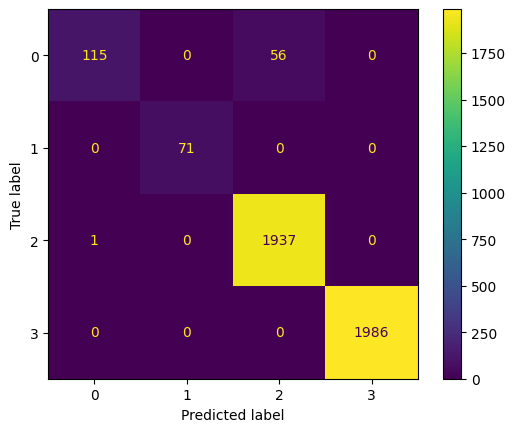

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score



conf_matrix = confusion_matrix(y_test, y_hat)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_hat)
precision_macro = precision_score(y_test, y_hat, average='macro')
precision_micro = precision_score(y_test, y_hat, average='micro')
precision_weighted = precision_score(y_test, y_hat, average='weighted')

f1_weighted = f1_score(y_test, y_hat, average='weighted')
f1_macro = f1_score(y_test, y_hat, average='macro')
f1_micro = f1_score(y_test, y_hat, average='micro')


auc = roc_auc_score(y_test, dnn_model.predict(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Accuracy: {accuracy}")
print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

import pandas as pd
metrics = {
    "model" : "dnn",
    "attack_model" : "none",
    "Accuracy": accuracy,
    "Precision-micro": precision_micro,
    "Precision-macro": precision_macro,
    "Precision-weighted": precision_weighted,
    "F1-micro": f1_micro,
    "F1-macro": f1_macro,
    "F1-weighted": f1_weighted,
    "FPR": np.mean(fpr),
    "TPR": np.mean(tpr),
    "FNR": np.mean(fnr),
    "TNR": np.mean(tnr),
    "AUC": auc
}
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/Edge-IIoT/model.csv", mode='a', index=False)